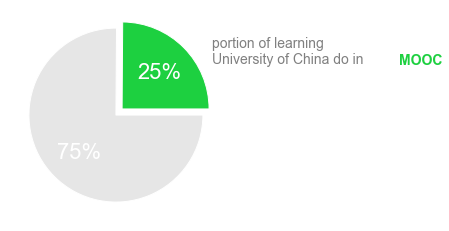

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

dat = pd.read_csv('multipleChoiceResponses.csv', dtype='object')
dat.drop(dat.index[0], inplace=True)
dat['Q4'] = dat['Q4'].apply(lambda x: x if x != 'Some college/university study without earning a bachelor’s degree' else 'Bachelor’s degree')
dat['Q3'] = dat['Q3'].apply(lambda x: x if x != 'United States of America' else 'USA')  
dat['Q3'] = dat['Q3'].apply(lambda x: x if x != 'United Kingdom of Great Britain and Northern Ireland' else 'UK')
dat['Age'] = dat['Q2'].astype('category').cat.as_ordered()
dat['Role_Experience'] = dat['Q8'].astype('category').cat.as_ordered()
dat['Coding%'] = dat['Q23'].astype('category').cat.as_ordered()
dat['Data_Experience'] = dat['Q24'].astype('category').cat.as_ordered()
dat['ML_Experience'] = dat['Q25'].astype('category').cat.as_ordered()
dat['Bias_Exploration'] = dat['Q43'].astype('category').cat.as_ordered()
dat['Insight_Exploration'] = dat['Q46'].astype('category').cat.as_ordered()

dat['Gender'] = dat['Q1']
dat['Country'] = dat['Q3']

dat['Gather Data'] = dat['Q34_Part_1'].astype(float)
dat['Clean Data'] = dat['Q34_Part_2'].astype(float)
dat['Visualize Data'] = dat['Q34_Part_3'].astype(float)
dat['Model Build/Select'] = dat['Q34_Part_4'].astype(float)
dat['Deploy to Prod'] = dat['Q34_Part_5'].astype(float)
dat['Find Insights'] = dat['Q34_Part_6'].astype(float)
dat['Other Time'] = dat['Q34_OTHER_TEXT'].astype(float)
dat['MOOC_Time'] = dat['Q35_Part_2'].astype(float)

mooc_use = dat['MOOC_Time'].describe()[1]
labels = ['Online Learning', 'Other Learning']
colors = ['#1DD040', '#E6E6E6']
explode = [0.1, 0]
sizes = [mooc_use, 100 - mooc_use]

fig1, ax1 = plt.subplots(figsize=(4,4))
plt.pie(sizes, colors=colors, explode=explode, autopct='%1.0f%%',\
        textprops={'color': 'white', 'fontsize': 22});
plt.text(1.1, 0.6, 'portion of learning\nUniversity of China do in', fontsize=14, color='grey')
plt.text(3.25, 0.59, 'MOOC', fontsize=14, color='#1DD040', fontweight='bold');

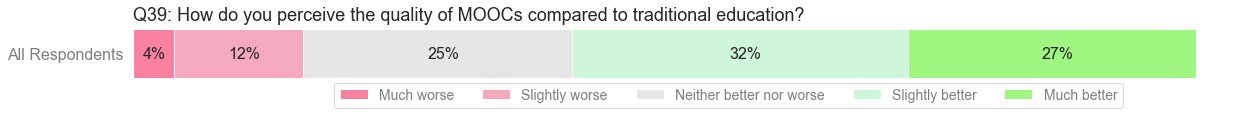

In [85]:
cnts = dat['Q39_Part_1'].value_counts()
no_opinion = cnts['No opinion; I do not know']
cnts = cnts.drop(labels = ['No opinion; I do not know'])
cnts = cnts/cnts.sum()

sns.set()
pref_order = ['Much worse', 'Slightly worse', 'Neither better nor worse', 'Slightly better', 'Much better']
pref_color = ['#F7819F', '#F5A9BC', '#E6E6E6', '#CEF6D8', '#9FF781']

fig, ax = plt.subplots(figsize=(20,1))
plt.title('Q39: How do you perceive the quality of MOOCs compared to traditional education?', fontsize=18, loc='left')
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=16, labelcolor='grey')  
ax.set_facecolor('white')

bar_start = 0
for i in pref_order:
    ax.barh(y=['All Respondents'], width=cnts[i], height=0.1, left=bar_start, color=pref_color[pref_order.index(i)])
    plt.text(bar_start + cnts[i]/2 - 0.01, -0.01, "{:.0%}".format(cnts[i]), fontsize=16)
    bar_start += cnts[i]
    
leg = ax.legend(pref_order, loc=(0.18,-0.5), ncol=5, fontsize=14, frameon=True, facecolor='white');
for txt in leg.get_texts():
    plt.setp(txt, color='grey')

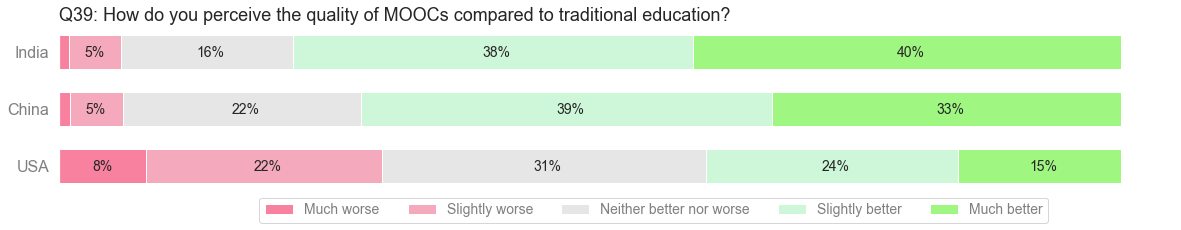

In [86]:
categories = ['USA', 'China', 'India']

cnts = pd.DataFrame(columns = categories)

for cat in categories:
    cnts[cat] = dat.loc[dat['Country'] == cat, 'Q39_Part_1'].value_counts()

cnts = cnts.drop('No opinion; I do not know')
cnts = cnts/cnts.sum()    

fig, ax = plt.subplots(figsize=(20,3))
plt.title('Q39: How do you perceive the quality of MOOCs compared to traditional education?', fontsize=18, loc='left')
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=16, labelcolor='grey')  
ax.set_facecolor('white')

for cat in categories:
    bar_start = 0
    for i in pref_order:
        ax.barh(y=[cat], width=cnts.loc[i,cat], height=0.6, left=bar_start, color=pref_color[pref_order.index(i)])
        if cnts.loc[i,cat] > 0.02:
            plt.text(bar_start + cnts.loc[i,cat]/2 - 0.01, categories.index(cat) - 0.1, "{:.0%}".format(cnts.loc[i,cat]), fontsize=14)
        bar_start += cnts.loc[i,cat]

leg = ax.legend(pref_order, loc=(0.18,-0.2), ncol=5, fontsize=14, frameon=True, facecolor='white');
for txt in leg.get_texts():
    plt.setp(txt, color='grey')

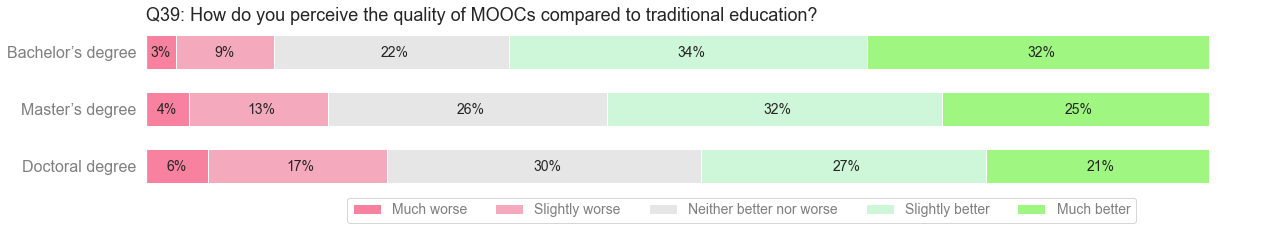

In [87]:
categories = ['Doctoral degree', 'Master’s degree', 'Bachelor’s degree']

cnts = pd.DataFrame(columns = categories)

for cat in categories:
    cnts[cat] = dat.loc[dat['Q4'] == cat, 'Q39_Part_1'].value_counts()

cnts = cnts.drop('No opinion; I do not know')
cnts = cnts/cnts.sum()    

fig, ax = plt.subplots(figsize=(20,3))
plt.title('Q39: How do you perceive the quality of MOOCs compared to traditional education?', fontsize=18, loc='left')
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=16, labelcolor='grey')  
ax.set_facecolor('white')

for cat in categories:
    bar_start = 0
    for i in pref_order:
        ax.barh(y=[cat], width=cnts.loc[i,cat], height=0.6, left=bar_start, color=pref_color[pref_order.index(i)])
        plt.text(bar_start + cnts.loc[i,cat]/2 - 0.01, categories.index(cat) - 0.1, "{:.0%}".format(cnts.loc[i,cat]), fontsize=14)
        bar_start += cnts.loc[i,cat]

leg = ax.legend(pref_order, loc=(0.18,-0.2), ncol=5, fontsize=14, frameon=True, facecolor='white');
for txt in leg.get_texts():
    plt.setp(txt, color='grey')

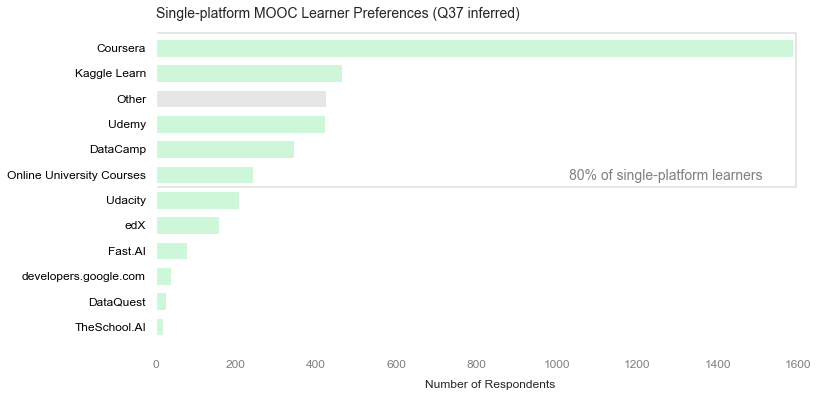

In [88]:
for i, row in dat.iloc[:,291:304].iterrows():
    if row['Q36_Part_12'] == 'None':
        dat.loc[i, 'Q37'] = 'None'                       
    elif row.count() == 1:
        dat.loc[i, 'Q37'] = ''.join(row.fillna(''))      

dat['No_MOOCs'] = dat.iloc[:,291:304].count(axis=1)

cnts = dat.loc[dat['No_MOOCs'] == 1, 'Q37'].value_counts()
cnts = cnts.drop(['None'])

plt_data = pd.DataFrame(cnts)
plt_data['hue'] = ['#CEF6D8'] * plt_data.shape[0]
plt_data.loc['Other', 'hue'] = '#E6E6E6'

fig, ax = plt.subplots(figsize=(12,6))
ax.set_facecolor('white')
plt.barh(y=plt_data.index, width=plt_data.Q37, height=0.7, color=plt_data.hue)
plt.title('Single-platform MOOC Learner Preferences (Q37 inferred)', fontsize=14, loc='left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.xlabel('Number of Respondents', labelpad = 10)
ax.tick_params(axis='x', colors='grey', labelsize=12)

ax.yaxis.grid(False)
ax.tick_params(axis='y', colors='black', labelsize=12)

plt.gca().invert_yaxis()

rect = patches.Rectangle((0,-0.6),1595,6.08,linewidth=0.4,edgecolor='grey',facecolor='none')
plt.text(1030, 5.2, '80% of single-platform learners', fontsize=14, color='grey')
ax.add_patch(rect);

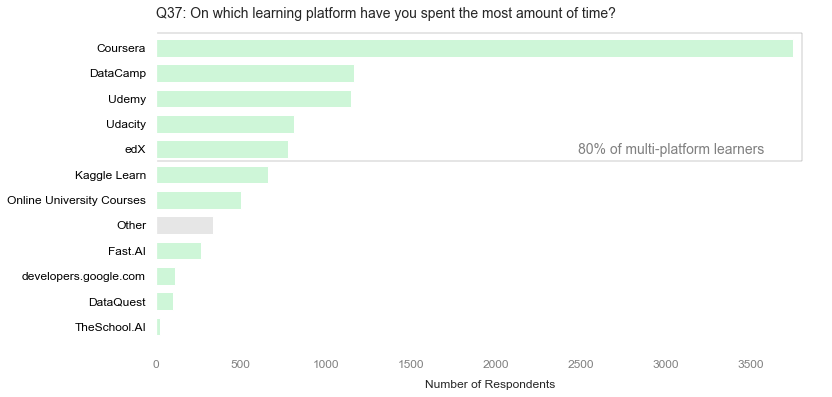

In [89]:
cnts = dat.loc[dat['No_MOOCs'] > 1, 'Q37'].value_counts()

plt_data = pd.DataFrame(cnts)
plt_data['hue'] = ['#CEF6D8'] * plt_data.shape[0]
plt_data.loc['Other', 'hue'] = '#E6E6E6'

fig, ax = plt.subplots(figsize=(12,6))
ax.set_facecolor('white')
plt.barh(y=plt_data.index, width=plt_data.Q37, height=0.7, color=plt_data.hue)
plt.title('Q37: On which learning platform have you spent the most amount of time?', fontsize=14, loc='left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.xlabel('Number of Respondents', labelpad = 10)
ax.tick_params(axis='x', colors='grey', labelsize=12)

ax.yaxis.grid(False)
ax.tick_params(axis='y', colors='black', labelsize=12)

plt.gca().invert_yaxis()

rect = patches.Rectangle((0,-0.6),3800,5.08,linewidth=0.4,edgecolor='grey',facecolor='none')
plt.text(2480, 4.2, '80% of multi-platform learners', fontsize=14, color='grey')
ax.add_patch(rect);

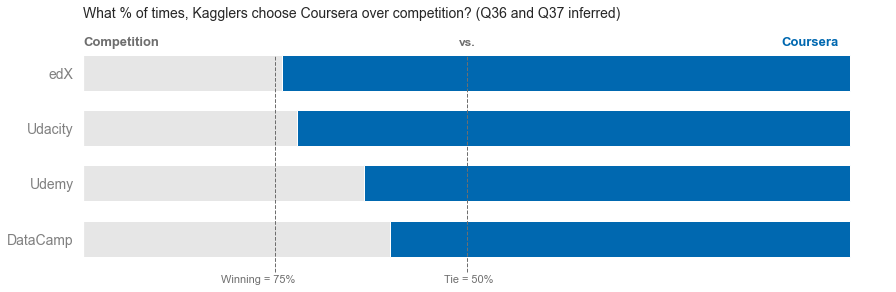

In [90]:
coursera = []
coursera.append(dat[(dat['Q36_Part_2'] == 'Coursera') & (dat['Q36_Part_4'] == 'DataCamp')]['Q37'].value_counts()[0])
coursera.append(dat[(dat['Q36_Part_2'] == 'Coursera') & (dat['Q36_Part_9'] == 'Udemy')]['Q37'].value_counts()[0])
coursera.append(dat[(dat['Q36_Part_2'] == 'Coursera') & (dat['Q36_Part_1'] == 'Udacity')]['Q37'].value_counts()[0])
coursera.append(dat[(dat['Q36_Part_2'] == 'Coursera') & (dat['Q36_Part_3'] == 'edX')]['Q37'].value_counts()[0])

competition = []
competition.append(dat[(dat['Q36_Part_2'] == 'Coursera') & (dat['Q36_Part_4'] == 'DataCamp')]['Q37'].value_counts()[1])
competition.append(dat[(dat['Q36_Part_2'] == 'Coursera') & (dat['Q36_Part_9'] == 'Udemy')]['Q37'].value_counts()[1])
competition.append(dat[(dat['Q36_Part_2'] == 'Coursera') & (dat['Q36_Part_1'] == 'Udacity')]['Q37'].value_counts()[1])
competition.append(dat[(dat['Q36_Part_2'] == 'Coursera') & (dat['Q36_Part_3'] == 'edX')]['Q37'].value_counts()[1])

plt_data = pd.DataFrame({'Coursera': coursera, 'Competition': competition})
plt_data = (plt_data.transpose()/plt_data.sum(axis=1)).transpose()

competition_labels = ['DataCamp', 'Udemy', 'Udacity', 'edX']

fig, ax = plt.subplots(figsize=(12,4))
plt.tight_layout()
ax.get_xaxis().set_visible(False)
ax.set_facecolor('white')

plt.barh(width = plt_data['Competition'], y=competition_labels, color = '#E6E6E6', height=0.65)
plt.barh(width = plt_data['Coursera'], left=plt_data['Competition'], y=competition_labels, height=0.65, color='#0068B0')

plt.plot([0.5, 0.5], [-0.6, 3.3], color='#6E6E6E', linestyle='--', linewidth=1)
plt.plot([0.25, 0.25], [-0.6, 3.3], color='#6E6E6E', linestyle='--', linewidth=1)

plt.text(0, 4, 'What % of times, Kagglers choose Coursera over competition? (Q36 and Q37 inferred)', fontsize=14)
plt.text(0.91, 3.5, 'Coursera', color='#0068B0', fontsize=13, fontweight='bold')
plt.text(0, 3.5, 'Competition', color='#6E6E6E', fontsize=13, fontweight='bold')
plt.text(0.49, 3.5, 'vs.', color='#6E6E6E', fontsize=12, fontweight='bold')
plt.text(0.47, -0.8, 'Tie = 50%', color='#6E6E6E', fontsize=11)
plt.text(0.18, -0.8, 'Winning = 75%', color='#6E6E6E', fontsize=11);

ax.tick_params(axis='y', colors='grey', labelsize=14)

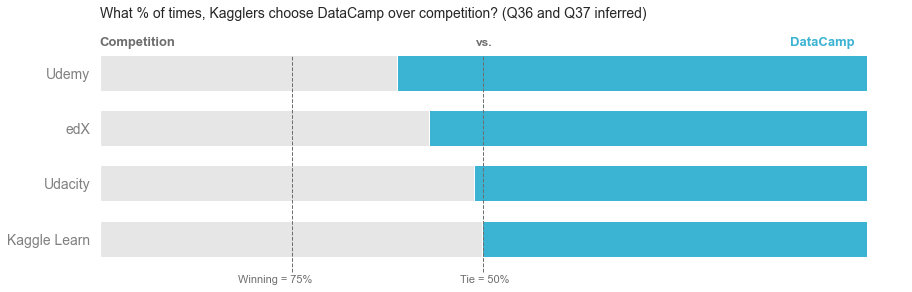

In [91]:
datacamp = []
datacamp.append(dat[(dat['Q36_Part_4'] == 'DataCamp') & (dat['Q36_Part_6'] == 'Kaggle Learn')]['Q37'].value_counts()[0])
datacamp.append(dat[(dat['Q36_Part_4'] == 'DataCamp') & (dat['Q36_Part_9'] == 'Udemy')]['Q37'].value_counts()[0])
datacamp.append(dat[(dat['Q36_Part_4'] == 'DataCamp') & (dat['Q36_Part_3'] == 'edX')]['Q37'].value_counts()[0])
datacamp.append(dat[(dat['Q36_Part_4'] == 'DataCamp') & (dat['Q36_Part_1'] == 'Udacity')]['Q37'].value_counts()[0])

competition = []
competition.append(dat[(dat['Q36_Part_4'] == 'DataCamp') & (dat['Q36_Part_6'] == 'Kaggle Learn')]['Q37'].value_counts()[1])
competition.append(dat[(dat['Q36_Part_4'] == 'DataCamp') & (dat['Q36_Part_9'] == 'Udemy')]['Q37'].value_counts()[1])
competition.append(dat[(dat['Q36_Part_4'] == 'DataCamp') & (dat['Q36_Part_3'] == 'edX')]['Q37'].value_counts()[1])
competition.append(dat[(dat['Q36_Part_4'] == 'DataCamp') & (dat['Q36_Part_1'] == 'Udacity')]['Q37'].value_counts()[1])

plt_data = pd.DataFrame({'DataCamp': datacamp, 'Competition': competition})
plt_data = (plt_data.transpose()/plt_data.sum(axis=1)).transpose()

competition_labels = ['Kaggle Learn', 'Udacity', 'edX', 'Udemy']

fig, ax = plt.subplots(figsize=(12,4))
plt.tight_layout()
ax.get_xaxis().set_visible(False)
ax.set_facecolor('white')

plt.barh(width = plt_data['Competition'], y=competition_labels, color = '#E6E6E6', height=0.65)
plt.barh(width = plt_data['DataCamp'], left=plt_data['Competition'], y=competition_labels, height=0.65, color='#3BB3D2')

plt.plot([0.5, 0.5], [-0.6, 3.3], color='#6E6E6E', linestyle='--', linewidth=1)
plt.plot([0.25, 0.25], [-0.6, 3.3], color='#6E6E6E', linestyle='--', linewidth=1)

plt.text(0, 4, 'What % of times, Kagglers choose DataCamp over competition? (Q36 and Q37 inferred)', fontsize=14)
plt.text(0.9, 3.5, 'DataCamp', color='#3BB3D2', fontsize=13, fontweight='bold')
plt.text(0, 3.5, 'Competition', color='#6E6E6E', fontsize=13, fontweight='bold')
plt.text(0.49, 3.5, 'vs.', color='#6E6E6E', fontsize=12, fontweight='bold')
plt.text(0.47, -0.8, 'Tie = 50%', color='#6E6E6E', fontsize=11)
plt.text(0.18, -0.8, 'Winning = 75%', color='#6E6E6E', fontsize=11);

ax.tick_params(axis='y', colors='grey', labelsize=14)

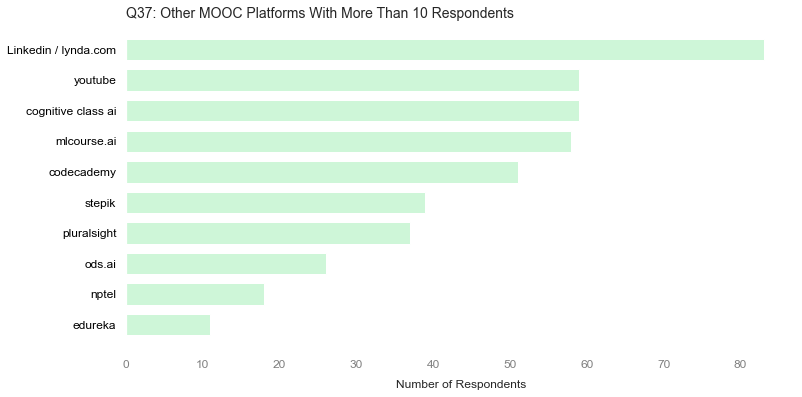

In [92]:
txt_dat = pd.read_csv('freeFormResponses.csv', dtype='object')

def txt_process(txt):
    if 'linkedin' in txt or 'lynda' in txt or 'linda' in txt or 'lybda' in txt:
        return 'Linkedin / lynda.com'
    elif 'codeacademy' in txt or 'codecademy' in txt or 'code academy' in txt:
        return 'codecademy'
    elif 'cognitive' in txt:
        return 'cognitive class ai'
    elif 'mlcourse' in txt:
        return 'mlcourse.ai'
    elif 'stepic' in txt or 'stepik' in txt:
        return 'stepik'
    elif 'nptel' in txt:
        return 'nptel'
    elif 'vidhya' in txt:
        return 'analytics vidhya'
    elif 'ods' in txt:
        return 'ods.ai'
    elif 'pluralsight' in txt:
        return 'pluralsight'
    else:
        return txt

txt_dat['Q36_OTHER_TEXT'] = txt_dat['Q36_OTHER_TEXT'].dropna().apply(lambda x: x.lower().strip())
txt_dat['Q36_OTHER_TEXT'] = txt_dat['Q36_OTHER_TEXT'].dropna().apply(txt_process)

fig, ax = plt.subplots(figsize=(12,6))
ax.set_facecolor('white')
plt.title('Q37: Other MOOC Platforms With More Than 10 Respondents', fontsize=14, loc='left')

plt.barh(width=txt_dat['Q36_OTHER_TEXT'].value_counts()[:10], y=txt_dat['Q36_OTHER_TEXT'].value_counts()[:10].index, height=0.7, color='#CEF6D8');

plt.xlabel('Number of Respondents', labelpad = 10)
ax.tick_params(axis='x', colors='grey', labelsize=12)

ax.yaxis.grid(False)
ax.tick_params(axis='y', colors='black', labelsize=12)

plt.gca().invert_yaxis();

In [44]:
import sys
import findspark
findspark.init()
import re
from operator import add
from pyspark.sql import SparkSession
import pyspark.sql.functions as f

spark=SparkSession.builder.appName('MOvies').getOrCreate()
df = spark.read.csv("DataSet1.csv", header=True, inferSchema=True, sep=";")
#df.show()

In [45]:
lines = spark.read.text("DataSet1.txt").rdd.map(lambda r: r[0])
counts = lines.flatMap(lambda x : re.split(' |,|\*|\n',x)) .map(lambda x: (x, 1)) .reduceByKey(add)
output = counts.collect()
for (time, count) in output:
    print("%s: %i" % (time, count))

event_type	video_id	old_time	new_time	type	ID	Username	Date	currentTime	currenTime_res	old_speed	new_speed: 1
seek_video	i4x-ciee-08112230_2016_video-aD49599ad793454cbbdd395892ef634c	416.38	468	onSlideSeek	21378121	2015308080116/00	17/08/2017	77	120	70	90: 1
pause_video	i4x-ciee-08112230_2016_video-aD49599ad793454cbbdd395892ef634c	316.39	115	onSlidepause	21378221	2015368080116/00	17/09/2017	66	136	80	80: 1
speed_change_video	i4x-ciee-08112230_2016_video-aD49599ad793454cbbdd395892ef634c	416.38	998	onSlidespeed_change	22378121	2115368080116/00	18/09/2018	88	180	56	88: 1
seek_video	i5x-ciee-08112230_2016_video-aD49500ad778454cbbdd395892ef633c	516.37	478	onSlideSeek	23348121	2215368080116/00	19/09/2019	99	187	89	99: 1
pause_video	i5x-ciee-08112230_2016_video-aD49500ad778454cbbdd395892ef633c	216.40	225	onSlidepause	20370121	1915368080116/00	20/09/2020	66	195	40	87: 1
speed_change_video	i5x-ciee-08112230_2016_video-aD49500ad778454cbbdd395892ef633c	416.38	888	onSlidespeed_change	21378101	2015

In [ ]:
var videos = document.querySelectorAll("video");
for (var video of videos){
    video.playbackRate = 1.8; //the value is random.
    // you can change the above value as you like
}

In [35]:
from ipywidgets import Video, Image
from IPython.display import display
import numpy as np
import cv2
import base64

video = Video.from_file('3.m4v')
video

Video(value=b'\x00\x00\x00\x18ftypmp42\x00\x00\x00\x00mp41isom\x00\x00\x00(uuid\\\xa7\x08\xfb2\x8eB\x05\xa8ae\…

In [36]:
cap = cv2.VideoCapture('3.m4v')

frames = []

while(1):
    try:
        _, frame = cap.read()

        fgmask = cv2.Canny(frame, 100, 100)

        mask = fgmask > 100
        frame[mask, :] = 0

        frames.append(frame)
    except Exception:
        break

width = int(cap.get(3))
height = int(cap.get(4))

filename = '3.m4v'

fourcc = cv2.VideoWriter_fourcc(*'avc1')
writer = cv2.VideoWriter(filename, fourcc, 25, (width, height))

for frame in frames:
    writer.write(frame)

cap.release()
writer.release()

with open(filename, 'rb') as f:
    video.value = f.read()

In [37]:
from ipywidgets import Widget
Widget.close_all()

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random
import os
from pyspark.sql import SparkSession 
from pyspark.ml  import Pipeline     
from pyspark.sql import SQLContext  
from pyspark.sql.functions import mean,col,split, col, regexp_extract, when, lit
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import QuantileDiscretizer

spark = SparkSession.builder.appName('recommender_system').getOrCreate()

df=spark.read.csv('movie_ratings_df.csv',inferSchema=True,header=True)
df.limit(3).toPandas()

,userId,title,rating
0,196,Kolya (1996),3
1,63,Kolya (1996),3
2,226,Kolya (1996),5


In [12]:
df.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- rating: integer (nullable = true)



In [13]:
from pyspark.ml.feature import StringIndexer, IndexToString

stringIndexer = StringIndexer(inputCol='title', outputCol='title_new')
model = stringIndexer.fit(df)
indexed = model.transform(df)
indexed.limit(5).toPandas()

,userId,title,rating,title_new
0,196,Kolya (1996),3,287.0
1,63,Kolya (1996),3,287.0
2,226,Kolya (1996),5,287.0
3,154,Kolya (1996),3,287.0
4,306,Kolya (1996),5,287.0


In [14]:
train, test = indexed.randomSplit([0.75,0.25])

from pyspark.ml.recommendation import ALS

rec=ALS( maxIter=10,regParam=0.01,userCol='userId',itemCol='title_new',ratingCol='rating',nonnegative=True,coldStartStrategy="drop")
rec_model=rec.fit(train)
predicted_ratings=rec_model.transform(test)
predicted_ratings.limit(5).toPandas()

,userId,title,rating,title_new,prediction
0,593,Much Ado About Nothing (1993),5,148.0,3.859377
1,115,Much Ado About Nothing (1993),3,148.0,3.413118
2,497,Much Ado About Nothing (1993),2,148.0,3.873761
3,409,Much Ado About Nothing (1993),3,148.0,3.598542
4,360,Much Ado About Nothing (1993),4,148.0,3.852320


In [15]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator=RegressionEvaluator(metricName='rmse',predictionCol='prediction',labelCol='rating')
rmse=evaluator.evaluate(predicted_ratings)
print(rmse)

1.0170268585816182


In [16]:
unique_movies=indexed.select('title_new').distinct()
def top_movies(user_id,n):
    """
    This function returns the top 'n' movies that user has not seen yet but might like 
    
    """
    a = unique_movies.alias('a')
    watched_movies=indexed.filter(indexed['userId'] == user_id).select('title_new')
    b=watched_movies.alias('b')
    total_movies = a.join(b, a.title_new == b.title_new,how='left')
    remaining_movies=total_movies.where(col("b.title_new").isNull()).select(a.title_new).distinct()
    remaining_movies=remaining_movies.withColumn("userId",lit(int(user_id)))
    recommendations=rec_model.transform(remaining_movies).orderBy('prediction',ascending=False).limit(n)
    movie_title = IndexToString(inputCol="title_new", outputCol="title",labels=model.labels)
    final_recommendations=movie_title.transform(recommendations)
    
    return final_recommendations.show(n,False)

top_movies(60,5)

+---------+------+----------+-------------------------------------+
|title_new|userId|prediction|title                                |
+---------+------+----------+-------------------------------------+
|787.0    |60    |5.8433514 |Once Were Warriors (1994)            |
|1353.0   |60    |5.8198156 |C'est arriv� pr�s de chez vous (1992)|
|1347.0   |60    |5.6822987 |Angel Baby (1995)                    |
|835.0    |60    |5.582997  |Vanya on 42nd Street (1994)          |
|1410.0   |60    |5.4525967 |Bitter Sugar (Azucar Amargo) (1996)  |
+---------+------+----------+-------------------------------------+



In [17]:
spark = SparkSession.builder.appName('Play with pyspark ML on titatic_dataset').getOrCreate()
df = spark.read.csv('train.csv',header = 'True',inferSchema='True')

df.limit(3).toPandas()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S


In [18]:
df.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



C:\Users\hp 850\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


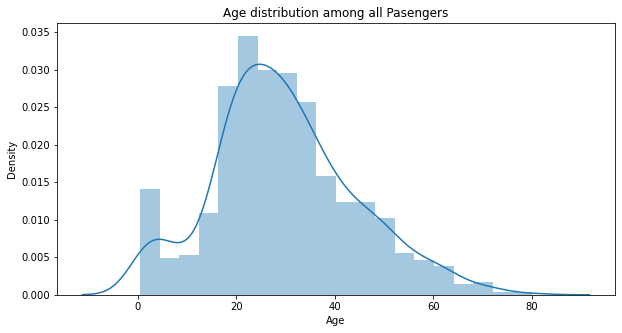

In [19]:
pandas_df = df.toPandas()

plt.figure(figsize=(10,5))
plt.title('Age distribution among all Pasengers')
sns.distplot(pandas_df['Age']);

In [20]:
from pyspark.sql.functions import isnan, when, count, col

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|       0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



In [21]:
df = df.drop("Cabin")

df = df.withColumn("Initial",regexp_extract(col("Name"),"([A-Za-z]+)\.",1))
df.limit(3).toPandas()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss


In [22]:
df = df.replace(['Mlle','Mme', 'Ms', 'Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr',  'Mrs',  'Mrs',  'Other',  'Other','Other','Mr','Mr','Mr'])

df.groupby('Initial').avg('Age').collect()

[Row(Initial='Miss', avg(Age)=21.86),
 Row(Initial='Other', avg(Age)=45.888888888888886),
 Row(Initial='Master', avg(Age)=4.574166666666667),
 Row(Initial='Mr', avg(Age)=32.73960880195599),
 Row(Initial='Mrs', avg(Age)=35.981818181818184)]

In [23]:
df = df.withColumn("Age",when((df["Initial"] == "Miss")   & (df["Age"].isNull()), 22).otherwise(df["Age"]))
df = df.withColumn("Age",when((df["Initial"] == "Other")  & (df["Age"].isNull()), 46).otherwise(df["Age"]))
df = df.withColumn("Age",when((df["Initial"] == "Master") & (df["Age"].isNull()), 5).otherwise( df["Age"]))
df = df.withColumn("Age",when((df["Initial"] == "Mr")     & (df["Age"].isNull()), 33).otherwise(df["Age"]))
df = df.withColumn("Age",when((df["Initial"] == "Mrs")    & (df["Age"].isNull()), 36).otherwise(df["Age"]))

df.groupBy("Embarked").count().show()

+--------+-----+
|Embarked|count|
+--------+-----+
|       Q|   77|
|    null|    2|
|       C|  168|
|       S|  644|
+--------+-----+



In [24]:
df = df.na.fill({"Embarked" : 'S'})

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-----------+--------+------+----+---+---+-----+-----+------+----+--------+-------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Embarked|Initial|
+-----------+--------+------+----+---+---+-----+-----+------+----+--------+-------+
|          0|       0|     0|   0|  0|  0|    0|    0|     0|   0|       0|      0|
+-----------+--------+------+----+---+---+-----+-----+------+----+--------+-------+



In [25]:
df = df.withColumn("Family_Size",col('SibSp')+col('Parch'))
df = df.withColumn('Alone',lit(0))
df = df.withColumn("Alone",when(df["Family_Size"] == 0, 1).otherwise(df["Alone"]))
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in ["Sex","Embarked","Initial"]]
pipeline = Pipeline(stages=indexers)
df = pipeline.fit(df).transform(df)

df.limit(3).toPandas()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial,Family_Size,Alone,Sex_index,Embarked_index,Initial_index
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,0,1.0,1.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,1,1.0,0.0,1.0


In [26]:
df = df.drop("PassengerId","Name","Ticket","Cabin","Embarked","Sex","Initial")
feature = VectorAssembler(inputCols = df.columns[1:],outputCol="features")
feature_vector= feature.transform(df)
feature_vector.limit(3).toPandas()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Alone,Sex_index,Embarked_index,Initial_index,features
0,0,3,22.0,1,0,7.2500,1,0,0.0,0.0,0.0,"(3.0, 22.0, 1.0, 0.0, 7.25, 1.0, 0.0, 0.0, 0.0..."
1,1,1,38.0,1,0,71.2833,1,0,1.0,1.0,2.0,"[1.0, 38.0, 1.0, 0.0, 71.2833, 1.0, 0.0, 1.0, ..."
2,1,3,26.0,0,0,7.9250,0,1,1.0,0.0,1.0,"[3.0, 26.0, 0.0, 0.0, 7.925, 0.0, 1.0, 1.0, 0...."


In [27]:
(train_df, test_df) = feature_vector.randomSplit([0.8, 0.2],seed = 11)
train_df.printSchema()

root
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Family_Size: integer (nullable = true)
 |-- Alone: integer (nullable = false)
 |-- Sex_index: double (nullable = false)
 |-- Embarked_index: double (nullable = false)
 |-- Initial_index: double (nullable = false)
 |-- features: vector (nullable = true)



In [28]:
titanic_df = feature_vector.select(['features','Survived'])
train_df,test_df = titanic_df.randomSplit([0.75,0.25])

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from sklearn.metrics import roc_curve,auc

lr = LogisticRegression(labelCol="Survived")

paramGrid = ParamGridBuilder().addGrid(lr.regParam, (0.01, 0.1)).addGrid(lr.maxIter, (5, 10)).addGrid(lr.tol, (1e-4, 1e-5)).addGrid(lr.elasticNetParam, (0.25,0.75)).build()
tvs = TrainValidationSplit( estimator=lr,estimatorParamMaps=paramGrid,evaluator=MulticlassClassificationEvaluator(labelCol='Survived'),trainRatio=0.8)
model = tvs.fit(train_df)
model_predictions= model.transform(test_df)
print('Accuracy: ', MulticlassClassificationEvaluator(labelCol='Survived',metricName='accuracy').evaluate(model_predictions))
print('Precision: ',MulticlassClassificationEvaluator(labelCol='Survived',metricName='weightedPrecision').evaluate(model_predictions))

Accuracy:  0.8252427184466019
Precision:  0.8244370563759484


In [29]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
from pyspark import SparkContext

sc =SparkContext.getOrCreate()   
results = model_predictions.select(['probability', 'Survived'])
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
metrics = metric(scoreAndLabels)
print("The ROC score is : ", metrics.areaUnderROC)

The ROC score is :  0.8944444444444444


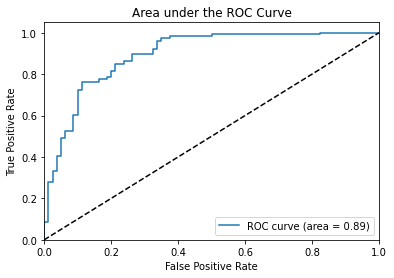

In [30]:
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area under the ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [31]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

rf = RandomForestClassifier(labelCol='Survived')
paramGrid = ParamGridBuilder().addGrid(rf.maxDepth, [5, 10, 20]).addGrid(rf.maxBins, [20, 32, 50]).addGrid(rf.numTrees, [20, 40, 60 ]).addGrid(rf.impurity, ["gini", "entropy"]).addGrid(rf.minInstancesPerNode, [1, 5, 10]).build()
tvs = TrainValidationSplit( estimator=rf,estimatorParamMaps=paramGrid,evaluator=MulticlassClassificationEvaluator(labelCol='Survived'),trainRatio=0.8)
model = tvs.fit(train_df)
model_predictions= model.transform(test_df)

print('Accuracy: ', MulticlassClassificationEvaluator(labelCol='Survived',metricName='accuracy').evaluate(model_predictions))
print('Precision: ',MulticlassClassificationEvaluator(labelCol='Survived',metricName='weightedPrecision').evaluate(model_predictions))

Accuracy:  0.8398058252427184
Precision:  0.8398679619866913


In [33]:
sc =SparkContext.getOrCreate()   
results = model_predictions.select(['probability', 'Survived'])
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list) 
metrics = metric(scoreAndLabels)

print("The ROC score is : ", metrics.areaUnderROC)

The ROC score is :  0.9049107142857143
